# Data Science Project Based on Australian Vehicle Prices Dataset

Mohammadpouya Alavi Naeini 48160202

## Dataset Description:

This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia. The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

* Brand: Name of the car manufacturer
* Year: Year of manufacture or release
* Model: Name or code of the car model
* Car/Suv: Type of the car (car or suv)
* Title: Title or description of the car
* UsedOrNew: Condition of the car (used or new)
* Transmission: Type of transmission (manual or automatic)
* Engine: Engine capacity or power (in litres or kilowatts)
* DriveType: Type of drive (front-wheel, rear-wheel, or all-wheel)
* FuelType: Type of fuel (petrol, diesel, hybrid, or electric)
* FuelConsumption: Fuel consumption rate (in litres per 100 km)
* Kilometres: Distance travelled by the car (in kilometres)
* ColourExtInt: Colour of the car (exterior and interior)
* Location: Location of the car (city and state)
* CylindersinEngine: Number of cylinders in the engine
* B odyType: Shape or style of the car body (sedan, hatchback, coupe, etc.)
* Doors: Number of doors in the car
* Seats: Number of seats in the car
* Price: Price of the car (in Australian dollars)


## AIM:

We would like to predict the price of the car base on the cars' features (e.g. manufacture year, transmission, engine). Meanwhile, we like to compare the performance of different regression models.


## Import Libraries

Here we import all the libraries we need.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from bleach import clean

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# this is used for random seed
student_id = 48160202

## Data Loading

We load in the CSV file and print the table head of the source data to check what kind of feature data has been included.

In [2]:
file_csv = "australian_vehicle_prices.csv"
raw = pd.read_csv(file_csv)
print("data shape is : ", raw.shape)
raw.head()

data shape is :  (16734, 19)


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


It shows that the raw dataset has 16,734 samples, each sample contains 19 values.


We drop the column **Title**, **ColourExtInt** and **Model** because they are irrelevant. The column **Car/Suv** are also dropped because it's overlapping with **BodyType**. Then we check the shape.

In [3]:
data = raw.drop(columns=['Title', 'Car/Suv', 'ColourExtInt', 'Model'])
print(data.shape)

(16734, 15)


We would like to do a further check to see the possible values of each column.

In [4]:
# Loop through each column and print the unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print("\n")

Unique values for column 'Brand':
['Ssangyong' 'MG' 'BMW' 'Mercedes-Benz' 'Renault' 'Toyota' 'Land' 'Nissan'
 'Honda' 'Volkswagen' 'Mitsubishi' 'Ford' 'Subaru' 'Hyundai' 'Jeep'
 'Volvo' 'Mazda' 'Abarth' 'Holden' 'Audi' 'Kia' 'Mini' 'Peugeot' 'Suzuki'
 'Dodge' 'Porsche' 'Daihatsu' 'Isuzu' 'Lexus' 'Jaguar' 'Rolls-Royce'
 'Skoda' 'Fiat' 'Haval' 'Citroen' 'LDV' 'HSV' 'Foton' 'Mahindra'
 'Maserati' 'Alfa' 'GWM' 'Ram' 'Tesla' 'Genesis' 'Chrysler' 'Great' 'Opel'
 'Saab' 'Bentley' 'Rover' nan 'Ferrari' 'Cupra' 'Chevrolet' 'Lamborghini'
 'FPV' 'McLaren' 'Chery' 'Iveco' 'Hummer' 'Infiniti' 'BYD' 'Tata' 'Aston'
 'Daewoo' 'Proton' 'Geely' 'Smart' 'Ineos' 'Caterham' 'Hino'
 'International' 'Lotus' 'Polestar' 'Datsun' 'Packard']


Unique values for column 'Year':
[2022. 2011. 2004. 2017. 2000. 2013. 2014. 2009. 2018. 2015. 2016. 2012.
 2023. 2005. 2019. 2021. 2007. 2010. 2003. 2008. 2006. 2020. 1999. 2002.
 1995. 1997. 1993. 2001. 1998. 1985. 1992.   nan 1986. 1996. 1994. 1989.
 1990. 1981. 1991. 19

As we can see, there are possible '-' in column **Transmission**, **FuelType**, and 'POA' in column **Price**. They are not *NaN* but are meaningless and should be converted to *NaN*.
Meanwhile, one of the value in **Location** is *Warrenheip, AU-VIC*.
As the format is < *Suburb, State* >, we are going to consolidate *AU-VIC* and *VIC* to *VIC*.

In [5]:
data.replace(['-','POA'],np.nan,inplace=True) 

data['Location'] = data['Location'].str.replace('AU-VIC', 'VIC')

Meanwhile, some of the columns are containing strings but could be presented by numerical data.

For example, the unit for **FuelConsumption** is *L/100km*, thus we could only keep the numerical data within the string.

The column **Location** are too specific and won't help with the project. We keep the States only.

The column **Engine** are partially overlapping with **CylindersinEngine**, we keep the displacement in new column **Displacement** and discard the **Engine**.

In [6]:
# perform string manipulation then convert to numeric value
data['FuelConsumption'] = data['FuelConsumption'].str.split('/').str[0].str.split().str[0]
data['FuelConsumption'] = pd.to_numeric(data['FuelConsumption'], errors='coerce') # we use 'coerce' to keep NaN

# perform string manipulation
data['Location'] = data['Location'].str.split(',').str[1].str.strip()

# perform string manipulation then convert to numeric value
data['Displacement'] = data['Engine'].str.split(',').str[1].str.split().str[0]
data['Displacement'] = pd.to_numeric(data['Displacement'], errors='coerce')
data.drop(columns=['Engine'], inplace=True)

# perform string manipulation then convert to numeric value
data['CylindersinEngine'] = data['CylindersinEngine'].str.split().str[0]
data['CylindersinEngine'] = pd.to_numeric(data['CylindersinEngine'], errors='coerce')

# perform string manipulation then convert to numeric value
data['Doors'] = data['Doors'].str.split().str[0]
data['Doors'] = pd.to_numeric(data['Doors'], errors='coerce')

# perform string manipulation then convert to numeric value
data['Seats'] = data['Seats'].str.split().str[0]
data['Seats'] = pd.to_numeric(data['Seats'], errors='coerce')

# convert to numeric value
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# convert to numeric value
data['Kilometres'] = pd.to_numeric(data['Kilometres'], errors='coerce')


We check the shape and the percentage of missing data.

In [7]:
print("Data shape:", data.shape)
print("Percentage of data missing from each column")
data.isnull().sum()/len(data)*100

Data shape: (16734, 15)
Percentage of data missing from each column


Brand                 0.005976
Year                  0.005976
UsedOrNew             0.005976
Transmission          1.505916
DriveType             0.005976
FuelType              3.812597
FuelConsumption      10.147006
Kilometres            3.537708
Location              2.689136
CylindersinEngine    10.009561
BodyType              1.685192
Doors                 9.585275
Seats                10.188837
Price                 0.316720
Displacement         10.654954
dtype: float64

We would like to drop the null values. However, column **FuelConsumption**, **CylindersinEngine**, **Doors**, **Seats** and **Displacement** have more than 5% data missing, so we cannot drop them since it will lose a lot of information from the data, we fill them with the average value of that column respectively.

In [8]:
#data.dropna(inplace=True)
#print("Data shape after processing the missing value:", data.shape)

# Issue 1: Improper Handling of Missing Values with dropna()

## Identification:
The old code attempted to entirely drop rows with missing data, leading to significant data loss in columns with over 5% missing data.The notebook uses data.dropna() to handle missing values, which removes all rows containing any missing data. This can be problematic when significant portions of columns contain missing values, leading to potential data loss and a biased dataset.

## Justification
Dropping rows with missing values can lead to the loss of valuable information, especially if the columns contain important predictive features. For columns with more than a small percentage of missing values, it’s better to use imputation (mean, median, mode) rather than simply discarding data. For example, replacing missing values in numerical columns with the mean or median retains the dataset’s structure and mitigates the risk of bias.

## Correction
The corrected approach fills missing values in critical columns with the mean to retain as much data as possible and only drops rows with remaining missing values after imputation. This method balances between addressing missing values and maintaining a comprehensive dataset for analysis.

In [9]:
# Fill missing values in columns that have more than 5% missing values with the column mean
data['FuelConsumption'].fillna(data['FuelConsumption'].mean(), inplace=True)
data['CylindersinEngine'].fillna(data['CylindersinEngine'].mean(), inplace=True)
data['Doors'].fillna(data['Doors'].mean(), inplace=True)
data['Seats'].fillna(data['Seats'].mean(), inplace=True)
data['Displacement'].fillna(data['Displacement'].mean(), inplace=True)

# Drop any remaining rows with missing values (if any)
data.dropna(inplace=True)

# Verify the shape after dropping rows with missing values
print("Data shape after processing the missing values:", data.shape)

Data shape after processing the missing values: (15306, 15)


## Visualisation

We would like to perform some visualisation. The following cells are rendering some figures for the analysis.

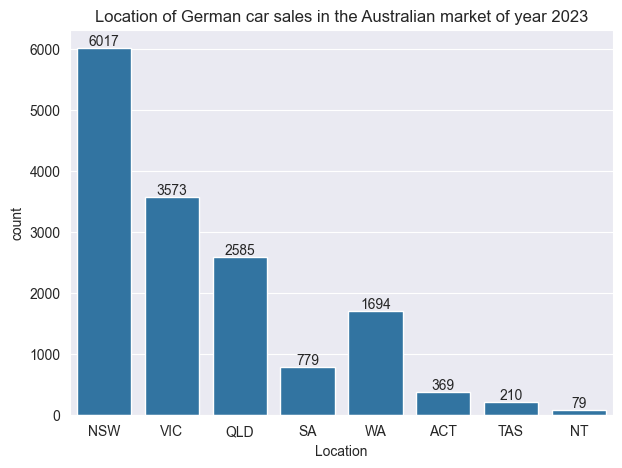

In [10]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data=data, x='Location')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Location of German car sales in the Australian market of year 2023')
plt.show()

We can see most of the cars were selling in NSW back in 2023, which aligns with the population distribution of Australia. [[Source]](https://www.worldatlas.com/articles/the-largest-states-and-territories-of-australia.html)

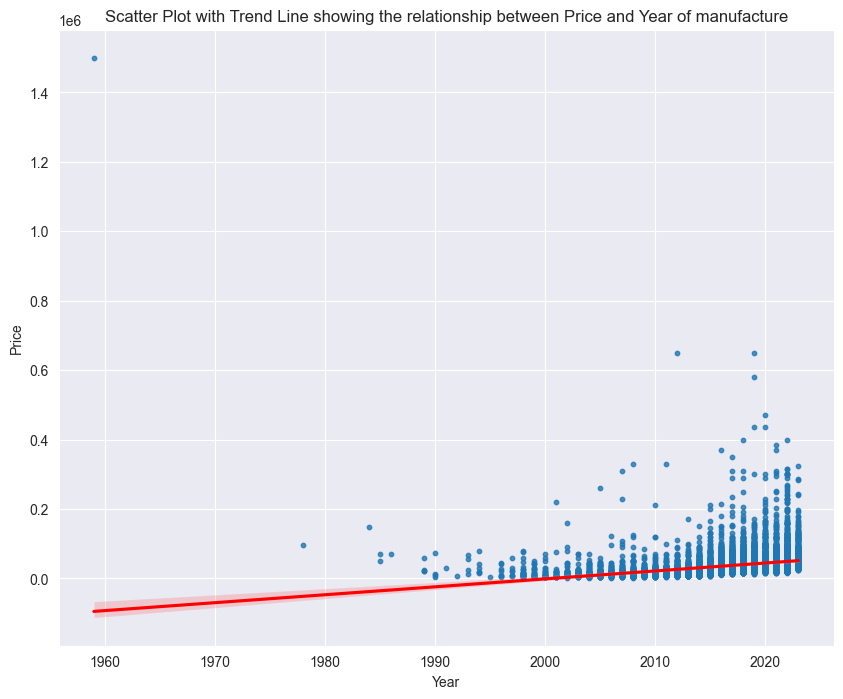

In [11]:
plt.figure(figsize=(10,8))
sns.regplot(data=data, x='Year', y='Price', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Scatter Plot with Trend Line showing the relationship between Price and Year of manufacture')
plt.show()

We can see the trends of the rising price accompanied by the newer  manufacturing year.

This also aligns with our common sense, *i.e.* the newer the car the higher the price.

## Encoding

We encode the categorical features to integers with OrdinalEncoder and drop the original column for simplicity.

In [12]:
#ord_enc = OrdinalEncoder(dtype=int)

#data["BrandCode"] = ord_enc.fit_transform(data[["Brand"]])
#data["UsedCode"] = ord_enc.fit_transform(data[["UsedOrNew"]])
#data["TransmissionCode"] = ord_enc.fit_transform(data[["Transmission"]])
#data["DriveTypeCode"] = ord_enc.fit_transform(data[["DriveType"]])
#data["FuelTypeCode"] = ord_enc.fit_transform(data[["FuelType"]])
#data["LocationCode"] = ord_enc.fit_transform(data[["Location"]])
#data["BodyTypeCode"] = ord_enc.fit_transform(data[["BodyType"]])

In [13]:
# Drop the categorical columns
#clean = data.drop(
    #columns=['Brand', 'UsedOrNew', 'Transmission', 'DriveType',
            #'FuelType', 'Location', 'BodyType'])

# Issue 2: Ordinal Encoding and Dropping of Categorical Columns

## Identification
The old code uses OrdinalEncoder for both ordered and unordered categorical columns, which is incorrect for columns like Brand, FuelType, and BodyType that do not have a natural order. This method is appropriate only for variables with inherent order, such as educational levels or ratings, not for nominal categories.


## Justification
Ordinal encoding assigns a rank to categorical data, which can mislead the model if the categories do not have an ordinal relationship. For instance, using ordinal encoding for Brand implies a ranking among them, which can introduce unnecessary bias and reduce the model’s interpretability and accuracy. Nominal data should use one-hot encoding to avoid implying false hierarchy.

## Correction
The corrected approach involves using OneHotEncoder for unordered columns and StandardScaler for numeric columns inside a ColumnTransformer. After applying these transformations, the resulting dataset should be correctly handled without further manual interventions. OrdinalEncoder should be applied only to ordered categories if any exist.

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Preprocessor with OneHotEncoder and StandardScaler 
pre_pro = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), data.select_dtypes(include=['float64', 'int64']).columns),  
        ('cat', OneHotEncoder(handle_unknown='ignore'), data.select_dtypes(include=['object']).columns)
    ]
)

# Applying the preprocessor to the dataset
processed_data = pre_pro.fit_transform(data)

In [15]:
# Drop the categorical columns
clean = data.drop(
    columns=['Brand', 'UsedOrNew', 'Transmission', 'DriveType',
             'FuelType', 'Location', 'BodyType'])

Now this ```clean``` will be used for following tasks. We check the shape and statistic info.

In [16]:
print(clean.shape)
data.describe(include="all")

(15306, 8)


,Brand,Year,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Displacement
count,15306,15306.000000,15306,15306,15306,15306,15306.000000,15306.000000,15306,15306.000000,15306,15306.000000,15306.000000,1.530600e+04,15306.000000
unique,66,NaN,3,2,5,8,NaN,NaN,8,NaN,10,NaN,NaN,NaN,NaN
top,Toyota,NaN,USED,Automatic,Front,Unleaded,NaN,NaN,NSW,NaN,SUV,NaN,NaN,NaN,NaN
freq,2522,NaN,14354,13510,6606,6726,NaN,NaN,6017,NaN,6514,NaN,NaN,NaN,NaN
mean,NaN,2016.025676,NaN,NaN,NaN,NaN,7.741051,101290.290017,NaN,4.428613,NaN,4.025740,5.121046,3.507147e+04,2.416477
std,NaN,4.993409,NaN,NaN,NaN,NaN,2.137879,78140.256535,NaN,1.066943,NaN,0.670905,1.055260,3.185882e+04,0.836184
min,NaN,1959.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,NaN,2.000000,2.000000,8.800000e+01,0.700000
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,6.700000,42852.250000,NaN,4.000000,NaN,4.000000,5.000000,1.895000e+04,2.000000
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,7.663661,86690.500000,NaN,4.000000,NaN,4.000000,5.000000,2.895000e+04,2.400000
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,8.700000,147681.750000,NaN,4.423601,NaN,4.000000,5.000000,4.199900e+04,2.800000


We also plot the feature distribution to observe the value distribution of each feature.

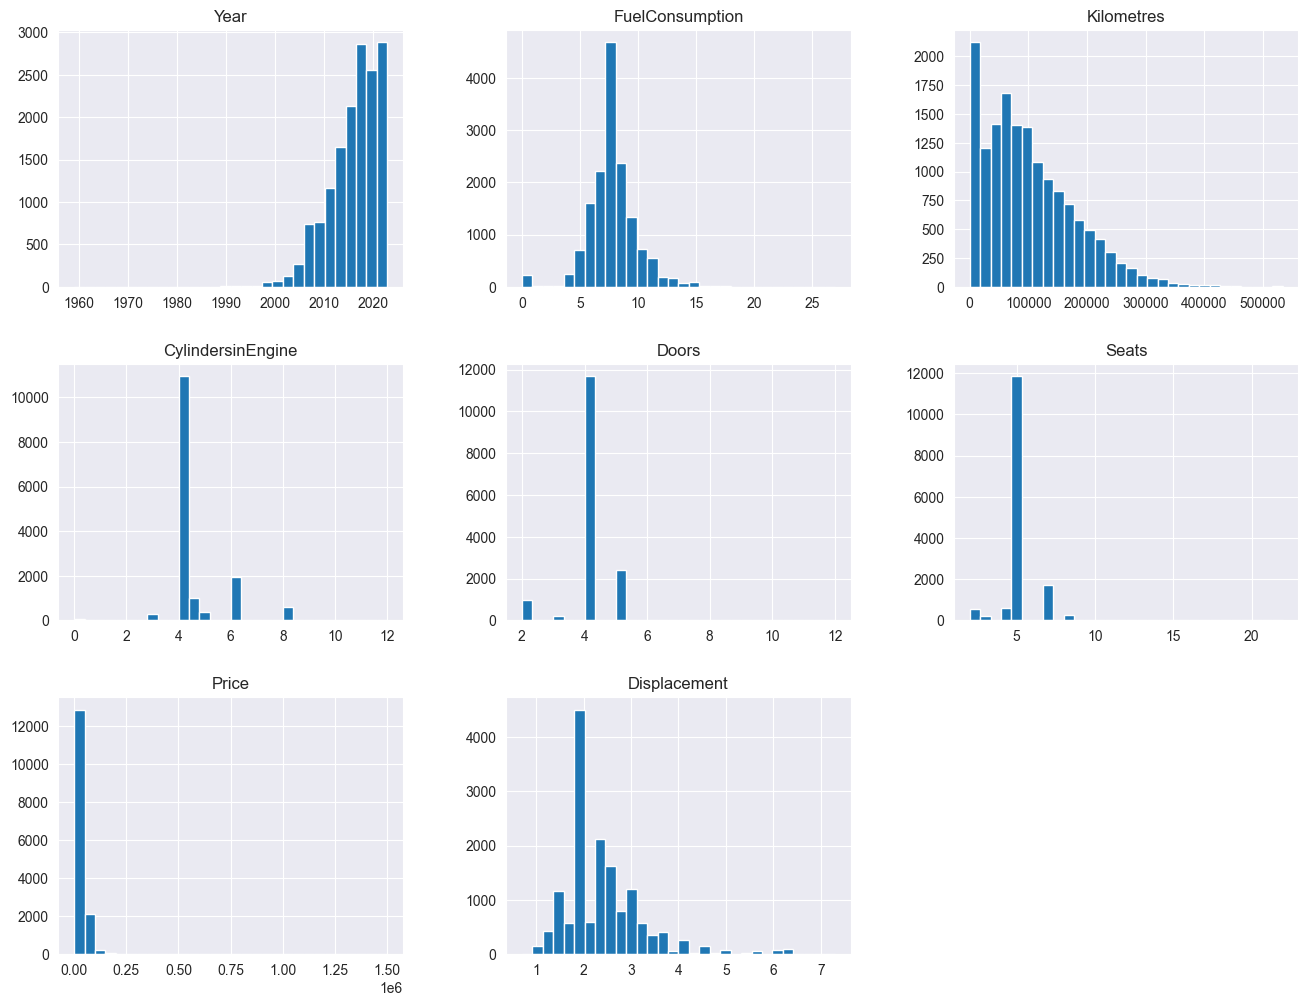

In [17]:
clean.hist(bins=30 ,figsize=(16,12))
plt.show()

## Feature Selection & Data Splitting

We first study the correlation between the price and other features.

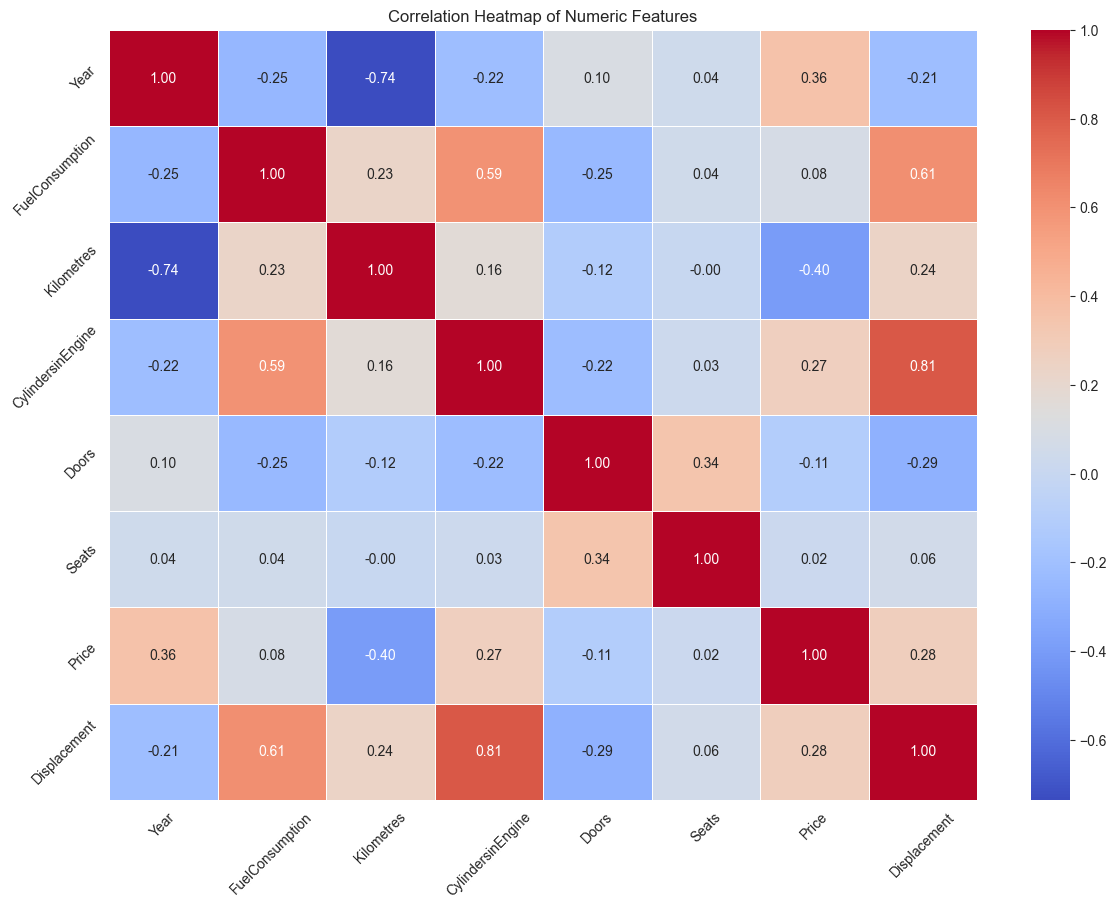

In [18]:
plt.figure(figsize=(14, 10))
sns.heatmap(clean.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Then we keep the 5-top most correlated features and split the dataset. We want the training set the size of 80% of full dataset.

In [19]:
X = clean[['Kilometres','Year','Displacement','CylindersinEngine','FuelConsumption']]
y = clean['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=student_id)

## Model Training & Evaluating

We then train and evaluate several models.

### Linear Regression (LR)

We perform linear regression to check the performance.
As overfitiing and underftiitng will both decrease the model performance, we would like to avoid them.

In [20]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with LR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with LR:
MSE: 558704467.5546534
Root MSE: 23636.930163510096
R^2: 0.40222173332307076


### Decision Tree Regression (DTR)

We perform decision tree regression to check the performance. We want to tune the model so that it's not overfitting nor underfitting.

In [22]:
#regressor = DecisionTreeRegressor(max_depth=2)
#regressor.fit(X_train, y_train)

In [23]:
# evaluate testing set
#y_pred = regressor.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#r2 = r2_score(y_test, y_pred)
#print("The results for testing set with DTR:")
#print("MSE:", mse)
#print("Root MSE:", rmse)
#print("R^2:", r2)

# Issue 3:  Lack of Cross-Validation and Hyperparameter Tuning in Decision Tree Regressor

## Identification

The old code applies a fixed max_depth=2 to the DecisionTreeRegressor model, limiting the tree depth without considering other potential tree depths that could improve model performance. The notebook trains the Decision Tree Regressor without cross-validation. Using a fixed max_depth=2 does not account for model complexity and might lead to overfitting or underfitting.

## Justification
Decision trees will be overfitting without proper tuning because they can memorise the training data instead of generalising. Cross-validation ensures that the model’s performance is assessed on multiple subsets of the data, while hyperparameter tuning optimises settings like max_depth to improve model generalisation and reduce overfitting or underfitting.

## Correction
Implement GridSearchCV to assess different values for max_depth and identify the optimal setting. Cross-validation with cv=5 can be applied to evaluate performance across data splits. This approach ensures that the decision tree is trained and assessed on diverse data subsets, improving reliability and performance.

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 4, 6, 8, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 8}


In [25]:
# Evaluate the optimized model
y_pred = best_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Optimised Decision Tree Results:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

Optimised Decision Tree Results:
MSE: 381204117.38658637
Root MSE: 19524.449221081406
R^2: 0.5921358253338629


In [26]:
# evaluate training set
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("Optimised Decision Tree Results:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

Optimised Decision Tree Results:
MSE: 708084408.7943128
Root MSE: 26609.85548240187
R^2: 0.3158113893095793


As the performance on training is higher than testing set , we can say it is overfitting.

### Multi-Layer Perceptron (MLP)

We then deploy an MLP regression and try to capture the inner non-linear relationship.

We would like a double hidden-layer structure with 100 and 100 for each layer respectively.

To save the calculation time, we would like to set the max_iteration as 1000.

In [27]:
#regressor = MLPRegressor(
  #  solver='adam',
  #  activation='identity',
   # alpha=0.0001,
   # random_state=student_id,
   # hidden_layer_sizes=(100,100),
    #max_iter=1000
#)

#regressor.fit(X_train, y_train)

In [28]:
# evaluate testing set
#y_pred = regressor.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#r2 = r2_score(y_test, y_pred)
#print("The results for testing set with MLP:")
#print("MSE:", mse)
#print("Root MSE:", rmse)
#print("R^2:", r2)

# Issue 4: Absence of Hyperparameter Tuning and Cross-Validation in MLP Regressor

## Identification:
The Multi-Layer Perceptron (MLP) Regressor is set up with fixed parameters, and no cross-validation or hyperparameter tuning is performed. This can lead to suboptimal performance due to underfitting or overfitting, as MLP models have complex structures that require parameter adjustments.

## Justification:
MLP models are sensitive to hyperparameters like hidden_layer_sizes, alpha, and max_iter. Fixed settings may not effectively capture the data’s patterns. Hyperparameter tuning with cross-validation allows the model to adjust layer sizes, learning rates, and regularisation, ensuring that the model captures complex relationships in the data without overfitting.

## Correction
The correction replaces the fixed parameters with a grid search approach, tuning the MLPRegressor by testing various hyperparameter combinations. Use GridSearchCV to optimise key hyperparameters for the MLP Regressor, such as hidden_layer_sizes, alpha, and max_iter. Cross-validation with cv=5 during grid search will ensure robust model performance across different subsets. This approach can significantly enhance the model’s predictive performance.


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(100, 100), (50, 50), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000],
    'early_stopping': [True]
}

grid_search = GridSearchCV(MLPRegressor(solver='adam', activation='identity', random_state=student_id), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_mlp = grid_search.best_estimator_
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'max_iter': 1000}


In [30]:
# Evaluate the optimized model
y_pred = best_mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Optimised MLP Results :")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

Optimised MLP Results :
MSE: 765037066.9658289
Root MSE: 27659.30344325086
R^2: 0.18145896732121802


In [31]:
# evaluate training set
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("Optimised MLP Results :")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

Optimised MLP Results :
MSE: 708084408.7943128
Root MSE: 26609.85548240187
R^2: 0.3158113893095793


As the performance of training set and testing set are similar, we can say it is not overfitting.

## Analysis

According to the result we have, among these three models (LR, DTR and MLP) the best option for this dataset is DTR. However, the relationships among the features within this dataset are not obvious for these models to catch, thus all the performance are not very satisfying. We might need to further clean the data (*e.g.* remove outliers) or deploy deep learning models for the prediction.